<a href="https://colab.research.google.com/github/am-eric/Cousera-projects/blob/main/K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>K-Nearest-Neighbor<h1>

---

### The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.


### Wine Quality classification Problem
---

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('WineQT.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
X = df_selected.drop('quality', axis=1).values

In [11]:
y = df_selected['quality'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# K-NN Model
from sklearn.neighbors import KNeighborsClassifier

**Minkowski distance**: This distance measure is the generalized form of Euclidean and Manhattan distance metrics. The parameter, p, in the formula below, allows for the creation of other distance metrics. Euclidean distance is represented by this formula when p is equal to two, and Manhattan distance is denoted with p equal to one.

In [15]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p=2)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# Predicting on the test set
y_pred = knn.predict(X_test)

In [18]:
# Evaluating the model
from sklearn.metrics import accuracy_score

In [19]:
accuracy = accuracy_score(y_test, y_pred)

In [20]:
print("Accuracy:", accuracy)

Accuracy: 0.5043731778425656


In [21]:
print("Predictions: {}, Actual Values: {}".format(y_pred[:5], y_test[:5]))

Predictions: [5 6 5 6 7], Actual Values: [5 6 5 6 6]


 correlation-based feature selection

In [6]:
import pandas as pd

# Assuming df contains your dataset
target_column = 'quality'
correlation_threshold = 0.1  # You can adjust this threshold

# Compute correlations between features and target
correlations = df.corr()[target_column]


In [7]:
# Filter features based on correlation threshold
# Select features with high correlation
selected_features = correlations[abs(correlations) > correlation_threshold].index.tolist()

The reason for selecting features with high correlation to the target variable is that they are more likely to have a strong predictive relationship with the target.

In [8]:
# Exclude the target column from selected features
selected_features.remove(target_column)


In [9]:
# Create a new DataFrame with selected features
df_selected = df[selected_features + [target_column]]
df_selected.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


KNN Models Accuracy slightly improved after feature selection

#### Using Support Vector Machines SVM

In [22]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   chlorides             1143 non-null   float64
 4   total sulfur dioxide  1143 non-null   float64
 5   density               1143 non-null   float64
 6   sulphates             1143 non-null   float64
 7   alcohol               1143 non-null   float64
 8   quality               1143 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 80.5 KB


#### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### SVM Model Creation and Training

In [25]:
from sklearn.svm import SVC

In [28]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [29]:
svm_accuracy = svm_model.score(X_test_scaled, y_test)
svm_accuracy

0.6064139941690962

In [30]:
print("Predictions: {}, Actual Valu es: {}".format(y_pred[:5], y_test[:5]))

Predictions: [5 6 5 6 7], Actual Valu es: [5 6 5 6 6]


Plotting the Accuracies

In [31]:
import matplotlib.pyplot as plt

In [32]:
models = ['knn', 'svm_model']

In [33]:
accuracies = [accuracy, svm_accuracy]

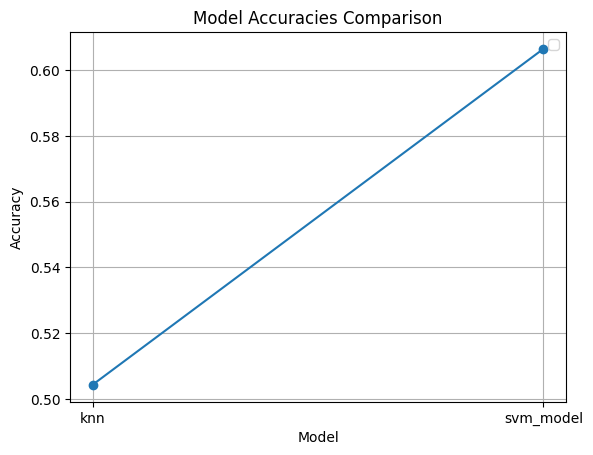

In [38]:
plt.plot(models, accuracies, marker='o')
# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')

# Display the graph
plt.grid(True)
plt.legend()
plt.show()